**Навигация по уроку**

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. [Практика](https://colab.research.google.com/drive/1jL4XbkAMuMNVPXhfsE8Z2Z4h-sGtyAq1)
3. Домашняя работа

Используя базу данных фильмов из практической части урока, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

In [1]:
#Напишите свое решение
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")
with open('the_movies_dataset.zip', 'wb') as f:
    f.write(response.content)
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'
# Для работы с файлами

# Отключим предупреждения Python, чтобы не захламлять лишним выводом наш Блокнот
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

In [3]:
import os
os.listdir(FILE_PATH)

['links.csv',
 'credits.csv',
 'keywords.csv',
 'ratings_small.csv',
 'movies_metadata.csv',
 'links_small.csv',
 'ratings.csv']

In [4]:
!wget https://autoplaza51.ru/test/top100.csv
top100_cast_df = pd.read_csv('top100.csv') # Загрузка Top100 актеров
top100_cast_df.head()

--2023-12-24 22:09:20--  https://autoplaza51.ru/test/top100.csv
Resolving autoplaza51.ru (autoplaza51.ru)... 31.31.196.206, 2a00:f940:2:2:1:1:0:168
Connecting to autoplaza51.ru (autoplaza51.ru)|31.31.196.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2088 (2.0K) [text/csv]
Saving to: ‘top100.csv’

top100.csv          100%[===================>]   2.04K  --.-KB/s    in 0s      

2023-12-24 22:09:21 (574 MB/s) - ‘top100.csv’ saved [2088/2088]



,rank,name,films
0,1,Samuel L. Jackson,67
1,2,Scarlett Johansson,33
2,3,Robert Downey,44
3,4,Zoe Saldana,32
4,5,Chris Pratt,23


In [5]:
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [7]:
df = df.dropna(subset=['release_date'])

In [8]:
df['day_of_week'] = df['release_date'].dt.day_name()


In [9]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Monday
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Friday
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Friday
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Friday
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Friday


In [10]:
films_by_day = df['day_of_week'].value_counts().sort_index()

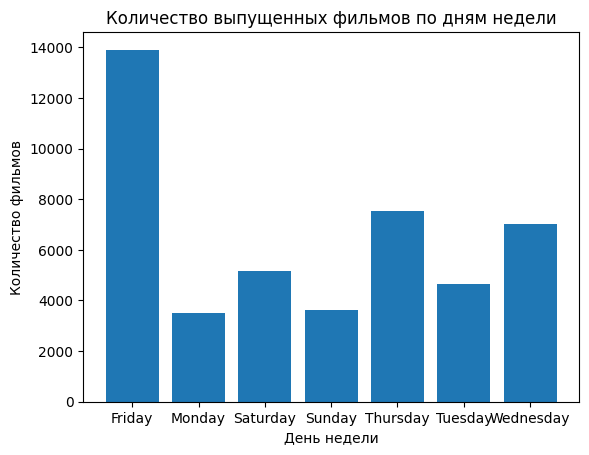

In [11]:
plt.bar(films_by_day.index, films_by_day.values)
plt.title('Количество выпущенных фильмов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество фильмов')
plt.show()

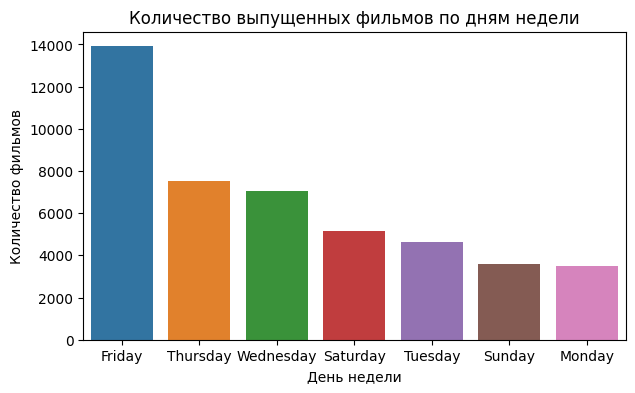

In [12]:
plt.figure(figsize=(7, 4))

sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index)
plt.title('Количество выпущенных фильмов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество фильмов')
plt.show()

In [13]:
credits_df = pd.read_csv('./the_movies_dataset/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [14]:
credits_df.drop(columns='crew', inplace=True)# удаляем не актеров

In [15]:
credits_df['cast'] = credits_df['cast'].apply(ast.literal_eval)#

In [16]:
#для добавления в датафрейм очищаем columns "id" от не int
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
df['id'] = df['id'].apply(convert_int)

In [17]:
df = df.drop(df[df['id'].isnull()].index)#дропает пустые ячейки

In [18]:
df['id'] = df['id'].astype('int')# переводит все значения в int

In [19]:
result_df = pd.merge(df, credits_df, on='id')# объеденяет датаф. по id

In [20]:
result_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week,cast
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Monday,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Friday,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Friday,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Friday,"[{'cast_id': 1, 'character': 'Savannah 'Vannah..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Friday,"[{'cast_id': 1, 'character': 'George Banks', '..."


In [21]:
sorted_revenue_df = result_df.sort_values(by='revenue', ascending=False)# сортируем по макс сборам
sorted_revenue_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week,cast
14611,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,Thursday,"[{'cast_id': 242, 'character': 'Jake Sully', '..."
26611,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.5,7993.0,Tuesday,"[{'cast_id': 73, 'character': 'Rey', 'credit_i..."
1645,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,Tuesday,"[{'cast_id': 20, 'character': 'Rose DeWitt Buk..."
17879,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0,Wednesday,"[{'cast_id': 46, 'character': 'Tony Stark / Ir..."
25126,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,Jurassic World,False,6.5,8842.0,Tuesday,"[{'cast_id': 10, 'character': 'Owen Grady', 'c..."


In [22]:
selected_columns_df = sorted_revenue_df[['original_title','revenue', 'cast']]
selected_columns_df.head()

,original_title,revenue,cast
14611,Avatar,2.787965e+09,"[{'cast_id': 242, 'character': 'Jake Sully', '..."
26611,Star Wars: The Force Awakens,2.068224e+09,"[{'cast_id': 73, 'character': 'Rey', 'credit_i..."
1645,Titanic,1.845034e+09,"[{'cast_id': 20, 'character': 'Rose DeWitt Buk..."
17879,The Avengers,1.519558e+09,"[{'cast_id': 46, 'character': 'Tony Stark / Ir..."
25126,Jurassic World,1.513529e+09,"[{'cast_id': 10, 'character': 'Owen Grady', 'c..."


In [23]:
selected_columns_df['cast'] = selected_columns_df['cast'].apply(lambda x: [item['name'] for item in x])
selected_columns_df.head()

,original_title,revenue,cast
14611,Avatar,2.787965e+09,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
26611,Star Wars: The Force Awakens,2.068224e+09,"[Daisy Ridley, John Boyega, Adam Driver, Harri..."
1645,Titanic,1.845034e+09,"[Kate Winslet, Leonardo DiCaprio, Frances Fish..."
17879,The Avengers,1.519558e+09,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,..."
25126,Jurassic World,1.513529e+09,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan..."


In [24]:
top100_revenue_df = selected_columns_df.head(100)

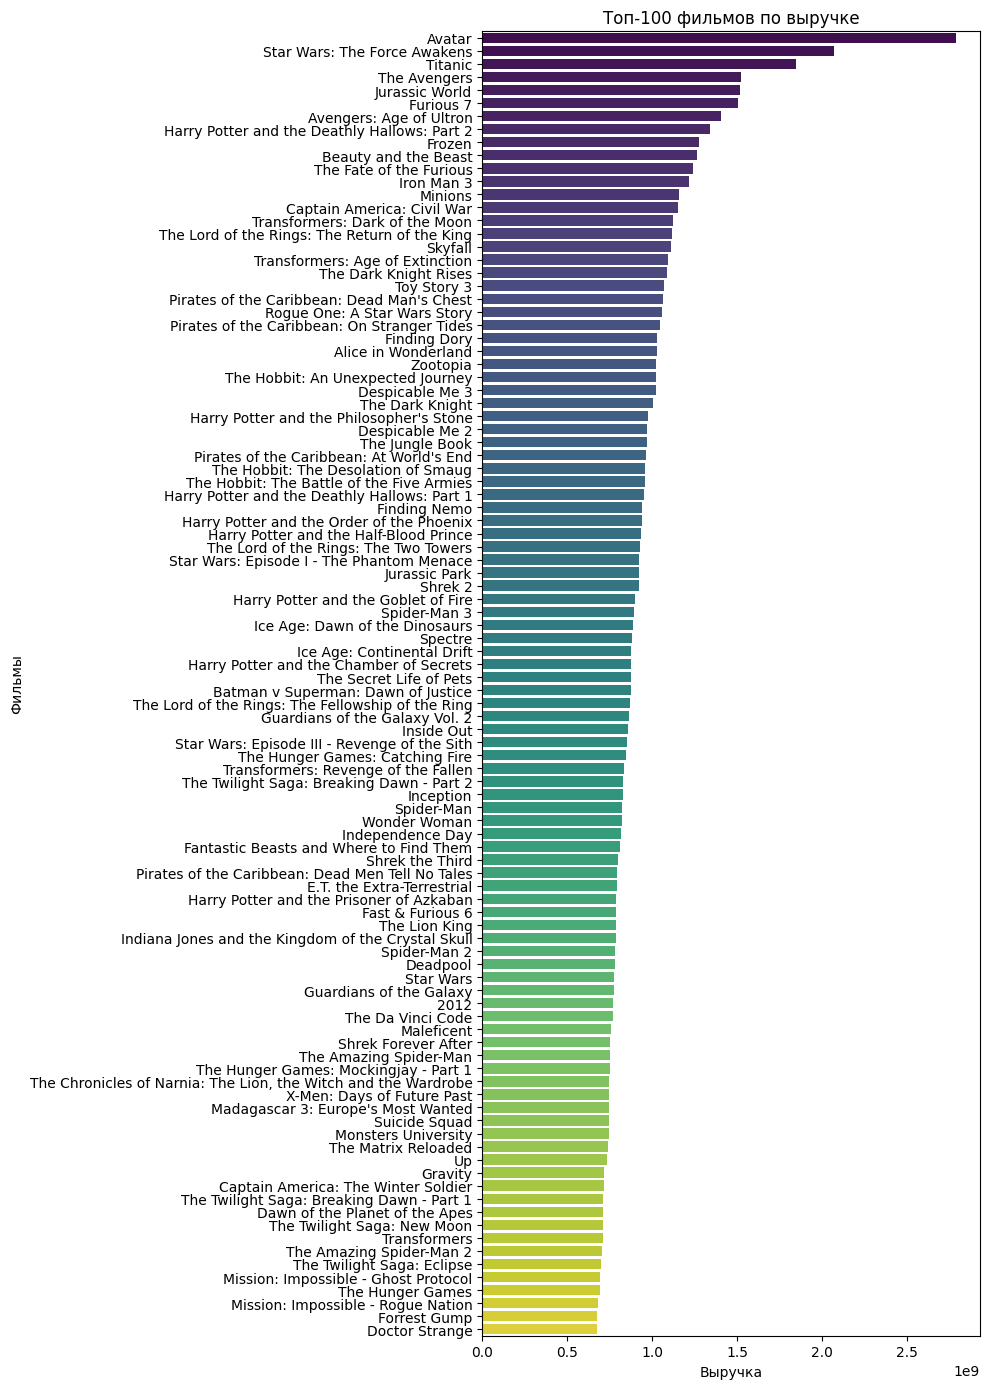

In [25]:
plt.figure(figsize=(10, 14))
sns.barplot(y='original_title', x='revenue', data=top100_revenue_df, palette='viridis')
plt.title('Топ-100 фильмов по выручке')
plt.xlabel('Выручка')
plt.ylabel('Фильмы')
#plt.xticks(rotation=90)  # Вращаем названия фильмов для улучшения читаемости
plt.tight_layout()
plt.show()

In [26]:
top100_revenue_df['quantit_cast'] = top100_revenue_df['cast'].apply(lambda x: len(x))

In [27]:
top100_actors_set = set(top100_cast_df['name'])

In [28]:
def update_cast(row):
    matching_cast = [actor for actor in row['cast'] if actor in top100_cast_df['name'].tolist()]
    return matching_cast

In [29]:
top100_revenue_df['cast_from_top100_cast'] = top100_revenue_df.apply(update_cast, axis=1)

In [30]:
top100_revenue_df['quantit_cast_from_top100'] = top100_revenue_df['cast_from_top100_cast'].apply(lambda x: len(x))

In [31]:
top100_revenue_df.head()

,original_title,revenue,cast,quantit_cast,cast_from_top100_cast,quantit_cast_from_top100
14611,Avatar,2.787965e+09,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",83,"[Sam Worthington, Zoe Saldana, Michelle Rodrig...",3
26611,Star Wars: The Force Awakens,2.068224e+09,"[Daisy Ridley, John Boyega, Adam Driver, Harri...",84,"[Daisy Ridley, John Boyega, Adam Driver, Harri...",9
1645,Titanic,1.845034e+09,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",136,[Leonardo DiCaprio],1
17879,The Avengers,1.519558e+09,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",115,"[Chris Evans, Mark Ruffalo, Chris Hemsworth, S...",9
25126,Jurassic World,1.513529e+09,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",28,[Chris Pratt],1


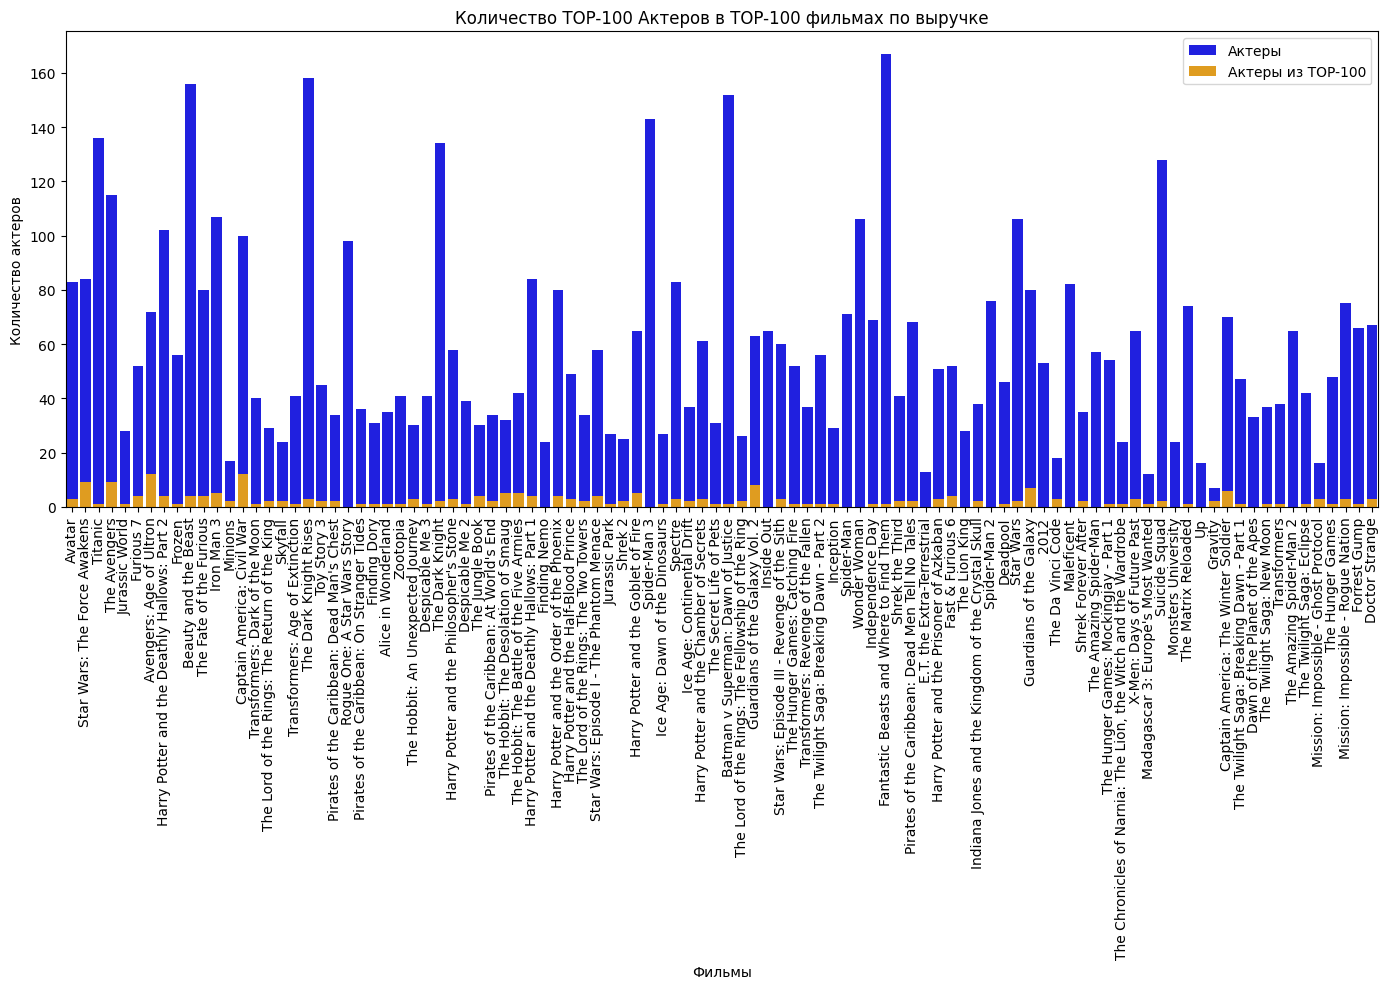

In [32]:
plt.figure(figsize=(14, 10))
sns.barplot(x='original_title', y='quantit_cast', data=top100_revenue_df, label='Актеры', color='blue')
sns.barplot(x='original_title', y='quantit_cast_from_top100', data=top100_revenue_df, label='Актеры из TOP-100', color='orange')
plt.title('Количество TOP-100 Актеров в TOP-100 фильмах по выручке')
plt.xlabel('Фильмы')
plt.ylabel('Количество актеров')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

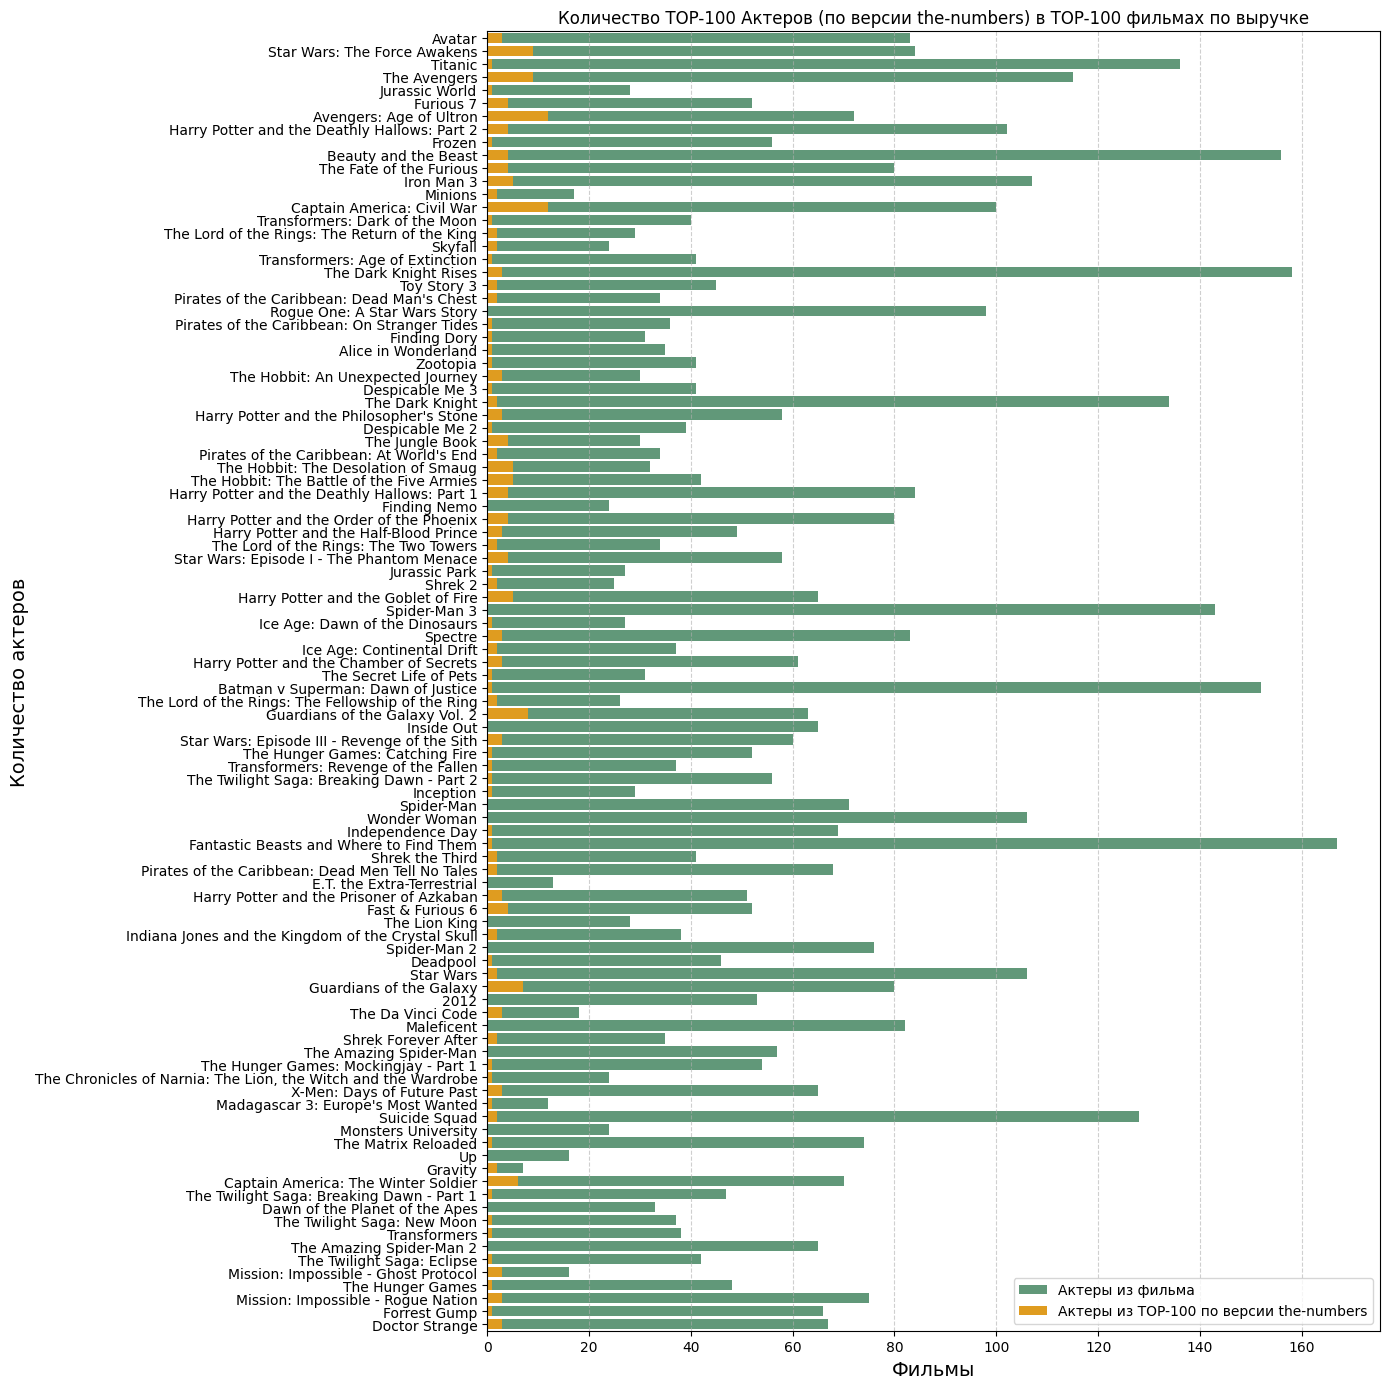

In [73]:
colors = sns.light_palette("seagreen", 10)

plt.figure(figsize=(14, 14))
sns.barplot(x='quantit_cast', y='original_title', data=top100_revenue_df, label='Актеры из фильма', color=colors[7]) #color='blue') #
sns.barplot(x='quantit_cast_from_top100', y='original_title', data=top100_revenue_df, label='Актеры из TOP-100 по версии the-numbers', color='orange') # color=colors[1])

plt.title('Количество TOP-100 Актеров (по версии the-numbers) в TOP-100 фильмах по выручке')
plt.xlabel('Фильмы', fontsize=14)
plt.ylabel('Количество актеров', fontsize=14)

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [35]:
result_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week,cast
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Monday,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Friday,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Friday,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Friday,"[{'cast_id': 1, 'character': 'Savannah 'Vannah..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Friday,"[{'cast_id': 1, 'character': 'George Banks', '..."


In [36]:
#для добавления в датафрейм очищаем columns "id" от не int
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
result_df['budget'] = result_df['budget'].apply(convert_int)

In [37]:
result_df = result_df.drop(result_df[result_df['budget'].isnull()].index)#дропает пустые ячейки

In [38]:
result_df['budget'] = result_df['budget'].astype('int')# переводит все значения в int

In [39]:
sorted_budget_df = result_df.sort_values(by='budget', ascending=False)# сортируем по макс сборам
sorted_budget_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week,cast
17184,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0,Saturday,"[{'cast_id': 15, 'character': 'Captain Jack Sp..."
11867,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0,Saturday,"[{'cast_id': 4, 'character': 'Captain Jack Spa..."
26614,False,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0,Wednesday,"[{'cast_id': 76, 'character': 'Tony Stark / Ir..."
11101,False,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0,Wednesday,"[{'cast_id': 3, 'character': 'Superman / Clark..."
44835,False,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0,Wednesday,"[{'cast_id': 2, 'character': 'Cade Yeager', 'c..."


In [40]:
top100_budget_df = sorted_budget_df.head(100)
top100_budget_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,day_of_week,cast
17184,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0,Saturday,"[{'cast_id': 15, 'character': 'Captain Jack Sp..."
11867,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0,Saturday,"[{'cast_id': 4, 'character': 'Captain Jack Spa..."
26614,False,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0,Wednesday,"[{'cast_id': 76, 'character': 'Tony Stark / Ir..."
11101,False,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0,Wednesday,"[{'cast_id': 3, 'character': 'Superman / Clark..."
44835,False,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0,Wednesday,"[{'cast_id': 2, 'character': 'Cade Yeager', 'c..."


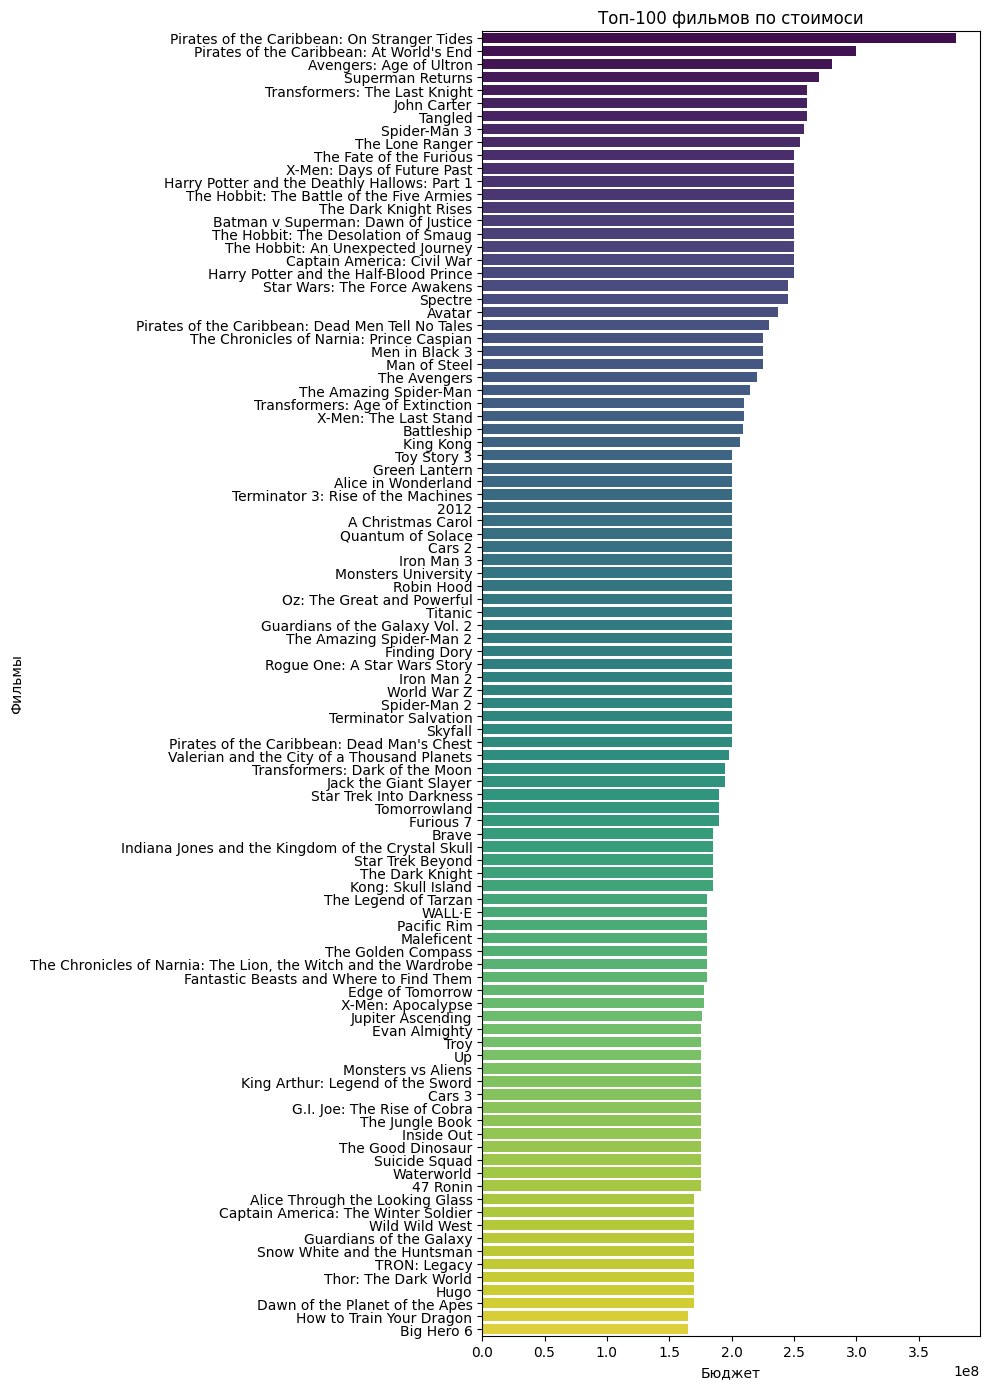

In [41]:
plt.figure(figsize=(10, 14))
sns.barplot(y='original_title', x='budget', data=top100_budget_df, palette='viridis')
plt.title('Топ-100 фильмов по стоимоси')
plt.xlabel('Бюджет')
plt.ylabel('Фильмы')
#plt.xticks(rotation=90)  # Вращаем названия фильмов для улучшения читаемости
plt.tight_layout()
plt.show()

In [42]:
selected_budget_df = top100_budget_df[['original_title','budget', 'cast']]
selected_budget_df.head()

,original_title,budget,cast
17184,Pirates of the Caribbean: On Stranger Tides,380000000,"[{'cast_id': 15, 'character': 'Captain Jack Sp..."
11867,Pirates of the Caribbean: At World's End,300000000,"[{'cast_id': 4, 'character': 'Captain Jack Spa..."
26614,Avengers: Age of Ultron,280000000,"[{'cast_id': 76, 'character': 'Tony Stark / Ir..."
11101,Superman Returns,270000000,"[{'cast_id': 3, 'character': 'Superman / Clark..."
44835,Transformers: The Last Knight,260000000,"[{'cast_id': 2, 'character': 'Cade Yeager', 'c..."


In [43]:
selected_budget_df['cast'] = selected_budget_df['cast'].apply(lambda x: [item['name'] for item in x])
selected_budget_df.head()

,original_title,budget,cast
17184,Pirates of the Caribbean: On Stranger Tides,380000000,"[Johnny Depp, Penélope Cruz, Ian McShane, Kevi..."
11867,Pirates of the Caribbean: At World's End,300000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
26614,Avengers: Age of Ultron,280000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
11101,Superman Returns,270000000,"[Brandon Routh, Kevin Spacey, Kate Bosworth, J..."
44835,Transformers: The Last Knight,260000000,"[Mark Wahlberg, Josh Duhamel, Laura Haddock, A..."


In [44]:
selected_budget_df['quantit_cast'] = selected_budget_df['cast'].apply(lambda x: len(x))
selected_budget_df.head()

,original_title,budget,cast,quantit_cast
17184,Pirates of the Caribbean: On Stranger Tides,380000000,"[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...",36
11867,Pirates of the Caribbean: At World's End,300000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",34
26614,Avengers: Age of Ultron,280000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",72
11101,Superman Returns,270000000,"[Brandon Routh, Kevin Spacey, Kate Bosworth, J...",18
44835,Transformers: The Last Knight,260000000,"[Mark Wahlberg, Josh Duhamel, Laura Haddock, A...",110


In [45]:
def update_cast(row):
    matching_cast = [actor for actor in row['cast'] if actor in top100_cast_df['name'].tolist()]
    return matching_cast

In [46]:
selected_budget_df['cast_from_top100_cast'] = selected_budget_df.apply(update_cast, axis=1)
selected_budget_df.head()

,original_title,budget,cast,quantit_cast,cast_from_top100_cast
17184,Pirates of the Caribbean: On Stranger Tides,380000000,"[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...",36,[Johnny Depp]
11867,Pirates of the Caribbean: At World's End,300000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",34,"[Johnny Depp, Orlando Bloom]"
26614,Avengers: Age of Ultron,280000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",72,"[Chris Hemsworth, Mark Ruffalo, Chris Evans, S..."
11101,Superman Returns,270000000,"[Brandon Routh, Kevin Spacey, Kate Bosworth, J...",18,[]
44835,Transformers: The Last Knight,260000000,"[Mark Wahlberg, Josh Duhamel, Laura Haddock, A...",110,"[Mark Wahlberg, Anthony Hopkins]"


In [47]:
selected_budget_df['quantit_cast_from_top100'] = selected_budget_df['cast_from_top100_cast'].apply(lambda x: len(x))
selected_budget_df.head()

,original_title,budget,cast,quantit_cast,cast_from_top100_cast,quantit_cast_from_top100
17184,Pirates of the Caribbean: On Stranger Tides,380000000,"[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...",36,[Johnny Depp],1
11867,Pirates of the Caribbean: At World's End,300000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",34,"[Johnny Depp, Orlando Bloom]",2
26614,Avengers: Age of Ultron,280000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",72,"[Chris Hemsworth, Mark Ruffalo, Chris Evans, S...",12
11101,Superman Returns,270000000,"[Brandon Routh, Kevin Spacey, Kate Bosworth, J...",18,[],0
44835,Transformers: The Last Knight,260000000,"[Mark Wahlberg, Josh Duhamel, Laura Haddock, A...",110,"[Mark Wahlberg, Anthony Hopkins]",2


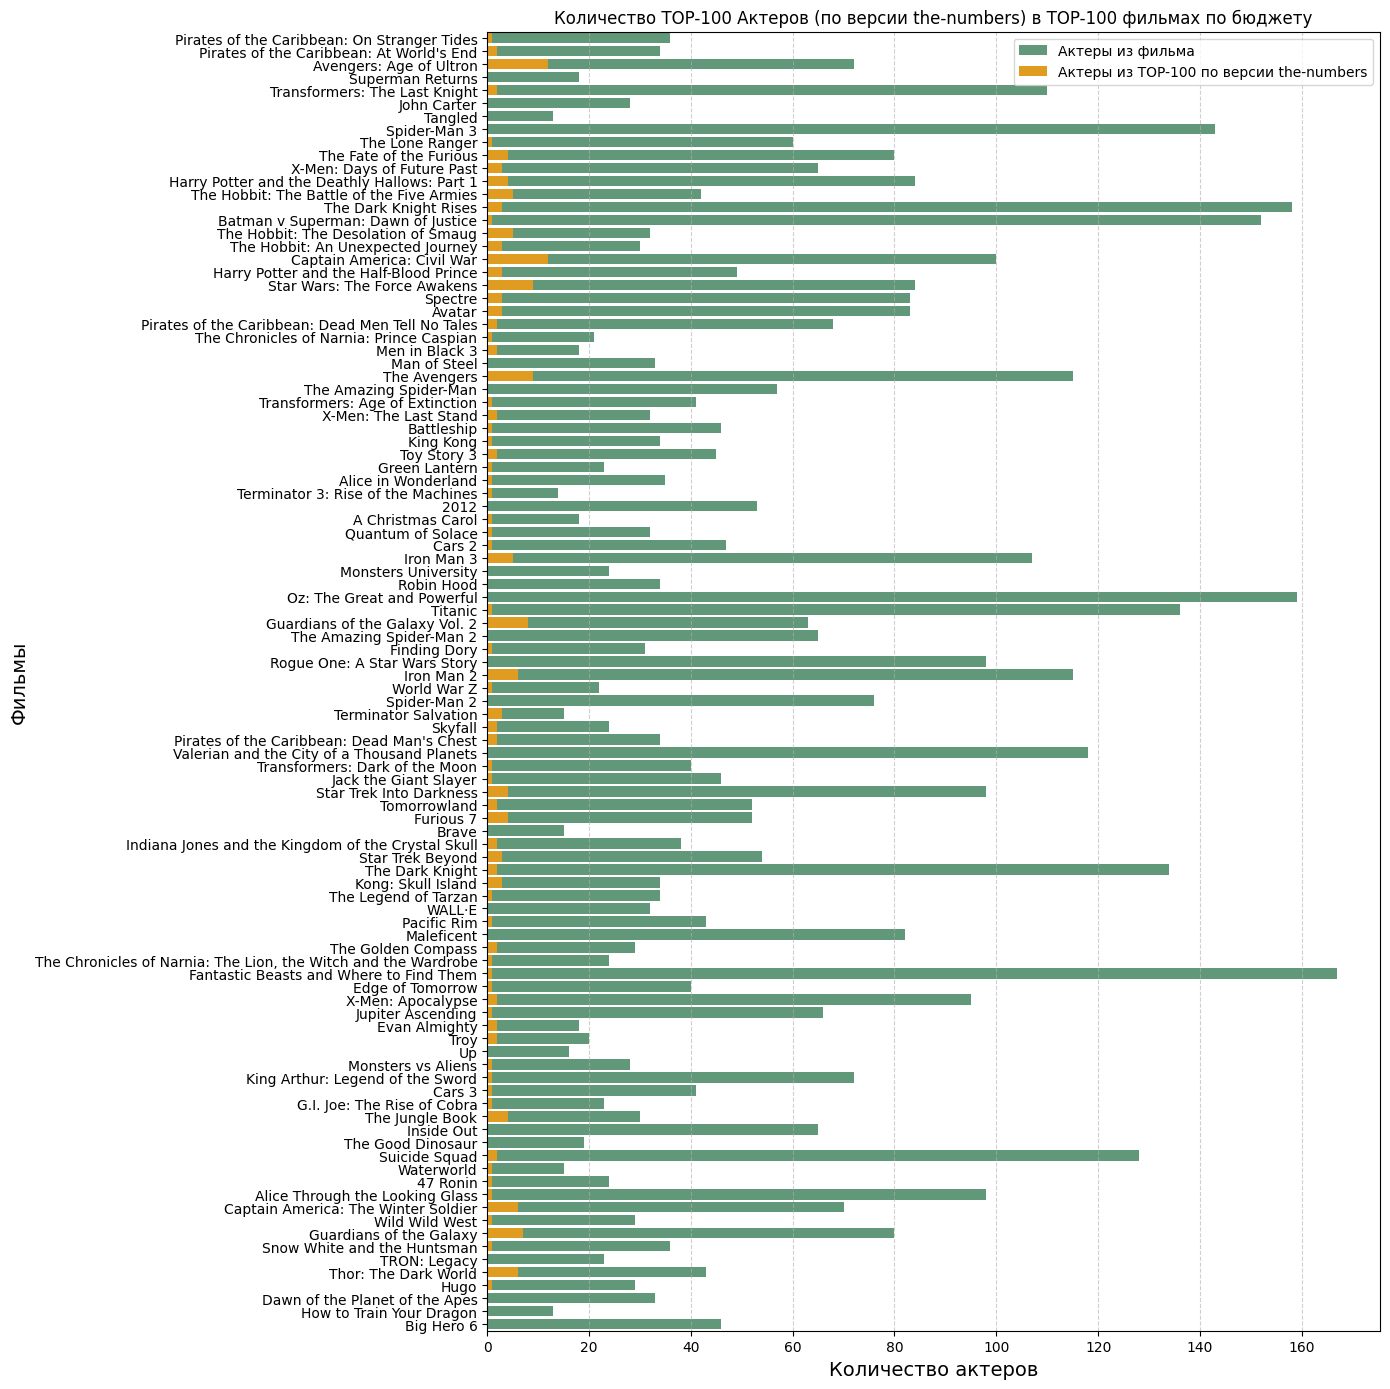

In [74]:
colors = sns.light_palette("seagreen", 10)

plt.figure(figsize=(14, 14))
sns.barplot(x='quantit_cast', y='original_title', data=selected_budget_df, label='Актеры из фильма', color=colors[7])
sns.barplot(x='quantit_cast_from_top100', y='original_title', data=selected_budget_df, label='Актеры из TOP-100 по версии the-numbers', color='orange')

plt.title('Количество TOP-100 Актеров (по версии the-numbers) в TOP-100 фильмах по бюджету')
plt.xlabel('Количество актеров', fontsize=14)
plt.ylabel('Фильмы', fontsize=14)

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()